# 1. Package import

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import textwrap
import itertools
import pandas.plotting._converter as pandacnv
pandacnv.register()

%matplotlib inline

# 2. Data acquisition

In [160]:
def data_acquisition(region,use_cache):
    
    ''' 
    Create a fundamental dictionary with all the data available
    '''

    if use_cache is True:

        data_dict={}

        adj_ABO_df=pd.read_csv(r'C:\Users\Eric.Li\Documents\Post result code\{0}_ABO.csv'.format(region))   
        adj_IPO_df=pd.read_csv(r'C:\Users\Eric.Li\Documents\Post result code\{0}_IPO.csv'.format(region))
        price_df=pd.read_csv(r'C:\Users\Eric.Li\Documents\Post result code\{0}_price.csv'.format(region))
        abs_return_df=pd.read_csv(r'C:\Users\Eric.Li\Documents\Post result code\{0}_abs_return.csv'.format(region))
        price_orig_df=pd.read_csv(r'C:\Users\Eric.Li\Documents\Post result code\{0}_price_orig.csv'.format(region))
        volume_df=pd.read_csv(r'C:\Users\Eric.Li\Documents\Post result code\{0}_volume.csv'.format(region))
        VWAP_df=pd.read_csv(r'C:\Users\Eric.Li\Documents\Post result code\{0}_VWAP.csv'.format(region))
        VWAP_orig_df=pd.read_csv(r'C:\Users\Eric.Li\Documents\Post result code\{0}_VWAP_orig.csv'.format(region))

        adj_ABO_df.index=pd.MultiIndex.from_tuples(list(zip(adj_ABO_df['Unnamed: 0'],\
                                                            adj_ABO_df.apply(lambda x:pd.\
                                                                             Timestamp(x[adj_ABO_df.iloc[:,1].name]),axis=1),\
                                                            adj_ABO_df.apply(lambda x:pd.\
                                                                             Timestamp(x[adj_ABO_df.iloc[:,2].name]),axis=1))))
        data_dict['ABO_df']=adj_ABO_df.iloc[:,3:]

        adj_IPO_df.index=pd.MultiIndex.from_tuples(list(zip(adj_IPO_df['Unnamed: 0'],\
                                                            adj_IPO_df.apply(lambda x:pd.\
                                                                             Timestamp(x[adj_IPO_df.iloc[:,1].name]),axis=1),\
                                                            adj_IPO_df.apply(lambda x:pd.\
                                                                             Timestamp(x[adj_IPO_df.iloc[:,2].name]),axis=1))))
        data_dict['IPO_df']=adj_IPO_df.iloc[:,3:]

        price_df.index=price_df.apply(lambda x:pd.Timestamp(x[price_df.iloc[:,0].name]),axis=1)
        data_dict['price_df']=price_df.iloc[:,1:]

        abs_return_df.index=abs_return_df.apply(lambda x:pd.Timestamp(x[abs_return_df.iloc[:,0].name]),axis=1)
        data_dict['abs_return_df']=abs_return_df.iloc[:,1:]

        price_orig_df.index=price_orig_df.apply(lambda x:pd.Timestamp(x[price_orig_df.iloc[:,0].name]),axis=1)
        data_dict['price_orig_df']=price_orig_df.iloc[:,1:]

        volume_df.index=volume_df.apply(lambda x:pd.Timestamp(x[volume_df.iloc[:,0].name]),axis=1)
        data_dict['volume_df']=volume_df.iloc[:,1:]

        VWAP_df.index=VWAP_df.apply(lambda x:pd.Timestamp(x[VWAP_df.iloc[:,0].name]),axis=1)
        data_dict['VWAP_df']=VWAP_df.iloc[:,1:]

        VWAP_orig_df.index=VWAP_orig_df.apply(lambda x:pd.Timestamp(x[VWAP_orig_df.iloc[:,0].name]),axis=1)
        data_dict['VWAP_orig_df']=VWAP_orig_df.iloc[:,1:]

            
#         except:
#             print("No such file!")    
    
    else:
        data_dict={}
        ABO_df=pd.read_excel(r'C:\Users\Eric.Li\Documents\Post result data\ABO {0}.xlsx'.format(region),\
                                           sheet_name='ABO',header=1).dropna(how='all',axis=1)

        IPO_df=pd.read_excel(r'C:\Users\Eric.Li\Documents\Post result data\ABO {0}.xlsx'.format(region),\
                                           sheet_name='IPO',header=1).dropna(how='all',axis=1)

        adj_ABO_df=ABO_df.set_index(pd.MultiIndex.from_tuples(list(zip(ABO_df["Ticker"],\
                                                                                   ABO_df["Announced Date"],\
                                                                                   ABO_df["Listing date"])))).\
        dropna(how='all',axis=1)

        adj_IPO_df=IPO_df.set_index(pd.MultiIndex.from_tuples(list(zip(IPO_df["Ticker"],\
                                                                                   IPO_df["Announced Date"],\
                                                                                   IPO_df["Listing date"])))).\
        dropna(how='all',axis=1)

        price_df=pd.read_excel(r'C:\Users\Eric.Li\Documents\Post result data\ABO {0}.xlsx'.format(region),\
                                           sheet_name='Price',header=1).set_index('Ticker').drop_duplicates().T

        abs_return_df=price_df/price_df.shift(1)-1

        price_orig_df=pd.read_excel(r'C:\Users\Eric.Li\Documents\Post result data\ABO {0}.xlsx'.format(region),\
                                           sheet_name='Price_orig',header=1).set_index('Ticker').drop_duplicates().T  

        volume_df=pd.read_excel(r'C:\Users\Eric.Li\Documents\Post result data\ABO {0}.xlsx'.format(region),\
                                           sheet_name='Volume',header=1).set_index('Ticker').drop_duplicates().T

        VWAP_df=pd.read_excel(r'C:\Users\Eric.Li\Documents\Post result data\ABO {0}.xlsx'.format(region),\
                                           sheet_name='VWAP',header=1).set_index('Ticker').drop_duplicates().T

        VWAP_orig_df=pd.read_excel(r'C:\Users\Eric.Li\Documents\Post result data\ABO {0}.xlsx'.format(region),\
                                           sheet_name='VWAP_orig',header=1).set_index('Ticker').drop_duplicates().T
        
        adj_ABO_df.to_csv(r'C:\Users\Eric.Li\Documents\Post result code\{0}_ABO.csv'.format(region))   
        adj_IPO_df.to_csv(r'C:\Users\Eric.Li\Documents\Post result code\{0}_IPO.csv'.format(region))
        price_df.to_csv(r'C:\Users\Eric.Li\Documents\Post result code\{0}_price.csv'.format(region))
        abs_return_df.to_csv(r'C:\Users\Eric.Li\Documents\Post result code\{0}_abs_return.csv'.format(region))
        price_orig_df.to_csv(r'C:\Users\Eric.Li\Documents\Post result code\{0}_price_orig.csv'.format(region))
        volume_df.to_csv(r'C:\Users\Eric.Li\Documents\Post result code\{0}_volume.csv'.format(region))
        VWAP_df.to_csv(r'C:\Users\Eric.Li\Documents\Post result code\{0}_VWAP.csv'.format(region))
        VWAP_orig_df.to_csv(r'C:\Users\Eric.Li\Documents\Post result code\{0}_VWAP_orig.csv'.format(region))
        
        data_dict['ABO_df']=adj_ABO_df
        data_dict['IPO_df']=adj_IPO_df
        data_dict['price_df']=price_df
        data_dict['abs_return_df']=abs_return_df
        data_dict['price_orig_df']=price_orig_df
        data_dict['volume_df']=volume_df
        data_dict['VWAP_df']=VWAP_df
        data_dict['VWAP_orig_df']=VWAP_orig_df
        
    return data_dict
    

In [161]:
Europe_dict=data_acquisition('Europe',use_cache=True)

In [162]:
US_dict=data_acquisition('US',use_cache=True)

# 3. Enrich the dataframe 

In [9]:
def adj_df(fundamental_df):
    ''' 
    Add some more data on the raw dataframe
    '''
    
    if 'ADV' in fundamental_df.columns:
        adj_df=fundamental_df[(fundamental_df["Market cap"]>500) & (fundamental_df["ADV"]>1)& (fundamental_df["Offer price"]>0)]
    else:
        adj_df=fundamental_df[(fundamental_df["Market cap"]>500)&(fundamental_df["Offer price"]>0)]
        adj_df["ADV"]=1000000
    
    adj_df=adj_df.dropna(how='all',axis=1)
    
    if 'Security type' in fundamental_df.columns:
        del adj_df['Security type']
    else:
        pass
    
    return adj_df

In [163]:
def adj_df(fundamental_df,price_orig_df,VWAP_orig_df):
    ''' 
    Add some more data on the raw dataframe
    '''
    
    if 'ADV' in fundamental_df.columns:
        adj_df=fundamental_df[(fundamental_df["Market cap"]>500) & (fundamental_df["ADV"]>1)& (fundamental_df["Offer price"]>0)]
    else:
        adj_df=fundamental_df[(fundamental_df["Market cap"]>500)&(fundamental_df["Offer price"]>0)]
        adj_df["ADV"]=1000000
    
    adj_df=adj_df.dropna(how='all',axis=1)
    
    if 'Security type' in fundamental_df.columns:
        del adj_df['Security type']
    else:
        pass
    
    adj_df["listing_price"]=adj_df.apply(lambda x:VWAP_orig_df.loc[:,x.name[0]][x["Listing date"]] \
                                              if x.name[0] in VWAP_orig_df.columns and \
                                              x.name[2] in VWAP_orig_df.index else None,axis=1)
        
    adj_df=adj_df[np.isfinite(adj_df['listing_price'])]
    
    adj_df["announce_price"]=adj_df.apply(lambda x:price_orig_df.loc[:, x.name[0]][x["Announced Date"]] \
                                              if x.name[0] in price_orig_df.columns and \
                                              x.name[1] in price_orig_df.index else None,axis=1)    
    
    adj_df["discount"]=adj_df['Offer price']/adj_df['announce_price']-1
    
    adj_df["firstday_return"]=adj_df['listing_price']/adj_df['Offer price']-1
    
    
    adj_df['Bookrunner']=adj_df.apply(lambda x:x['Bookrunner'].split(', ') #
                                              if type(x['Bookrunner'])==str else [None],axis=1)
    
    adj_df["Broker_broad"]=adj_df.apply(lambda x:len(set(['Goldman Sachs','JP Morgan','Morgan Stanley','UBS',\
                                                         'Barclays','Bank of America Merrill Lynch','Deutsche Bank',\
                                                         'Credit Suisse','Jefferies','Citi']).\
                                                            intersection(set(x['Bookrunner'])))>0,axis=1)    
    
    adj_df["Broker_core"]=adj_df.apply(lambda x:len(set(['Goldman Sachs','JP Morgan','Morgan Stanley']).\
                                                            intersection(set(x['Bookrunner'])))>0,axis=1)
    
    adj_df_core=adj_df[adj_df["Broker_core"]==True]
    adj_df_broad=adj_df[adj_df["Broker_broad"]==True]
    
    return adj_df_broad,adj_df_core

In [164]:
Europe_ABO_df,Europe_ABO_core_df=adj_df(Europe_dict['ABO_df'],Europe_dict['price_orig_df'],Europe_dict['VWAP_orig_df'])

In [165]:
Europe_IPO_df,Europe_IPO_core_df=adj_df(Europe_dict['IPO_df'],Europe_dict['price_orig_df'],Europe_dict['VWAP_orig_df'])

In [166]:
Europe_df=Europe_ABO_df.append(Europe_IPO_df,sort=True)

In [167]:
Europe_core_df=Europe_ABO_core_df.append(Europe_IPO_core_df,sort=True)

In [172]:
US_ABO_df,US_ABO_core_df=adj_df(US_dict['ABO_df'],US_dict['price_orig_df'],US_dict['VWAP_orig_df'])

In [173]:
US_IPO_df,US_IPO_core_df=adj_df(US_dict['IPO_df'],US_dict['price_orig_df'],US_dict['VWAP_orig_df'])

C:\Users\eric.li\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [174]:
US_df=US_ABO_df.append(US_IPO_df,sort=True)

In [175]:
US_core_df=US_ABO_core_df.append(US_IPO_core_df,sort=True)

# 4. Build the signal

In [101]:
def sizing(sizing_scheme,target_size,capital,fundamental_df,signal_df,volume_df,liquidity_constraint,allocation_constraint,\
          max_size,exit_rate):
    ''' 
    Calculate the sizing_df for the portfolio
    '''
    if sizing_scheme=='constant':
        sizing_row=signal_df.apply(lambda x:min(target_size*capital,liquidity_constraint*fundamental_df.loc[x.name,"ADV"],\
                                    allocation_constraint*fundamental_df.loc[x.name,"Offer size"])/capital,axis=0)
        
        sizing_dict={}
        for i in signal_df.columns:
            adj_return_series=signal_df[i].bfill(limit=1).dropna()
            adj_return_series.iloc[0]=0.0
            price_scale_series=(1+adj_return_series).cumprod()
            sizing_series=sizing_row[i]*price_scale_series
            sizing_series.iloc[-1]=None
            sizing_dict[i]=sizing_series
        
        sizing_df=pd.DataFrame(sizing_dict)
        
        
    elif sizing_scheme=='fix allocation':
        sizing_row=signal_df.apply(lambda x:min(max_size,min(liquidity_constraint*fundamental_df.loc[x.name,"ADV"],\
                                    allocation_constraint*fundamental_df.loc[x.name,"Offer size"])/capital),axis=0)  
        
        sizing_dict={}
        for i in signal_df.columns:
            adj_return_series=signal_df[i].bfill(limit=1).dropna()
            adj_return_series.iloc[0]=0.0
            price_scale_series=(1+adj_return_series).cumprod()
            sizing_series=sizing_row[i]*price_scale_series
            sizing_series.iloc[-1]=None
            sizing_dict[i]=sizing_series
        
        sizing_df=pd.DataFrame(sizing_dict)     
    
    elif sizing_scheme=='constant volume exit':
        
        '''
        Essentially the idea is to exit certain percentage of volume every day, the key is to use both volume scaler
        and stock return scaler to adjust the size
        '''
        
        
        sizing_row=signal_df.apply(lambda x:min(target_size*capital,liquidity_constraint*fundamental_df.loc[x.name,"ADV"],\
                                    allocation_constraint*fundamental_df.loc[x.name,"Offer size"])/capital,axis=0)
        
        allocation=signal_df.apply(lambda x:min(target_size*capital,liquidity_constraint*fundamental_df.loc[x.name,"ADV"],\
                                     allocation_constraint*fundamental_df.loc[x.name,"Offer size"])\
                                   /fundamental_df.loc[x.name,"Offer size"]*fundamental_df.loc[x.name,"Offer shares"],axis=0)
        
        raw_volume_scaler_df=signal_df.apply(lambda x:(allocation[x.name]-volume_df.loc[x.name[2]:,x.name[0]].cumsum()\
                                                       *exit_rate/1000000)/allocation[x.name],axis=0)
        
        raw_volume_scaler_df_positive=raw_volume_scaler_df[raw_volume_scaler_df>0]
        
        sizing_dict={}        
        
        for i in signal_df.columns:
            adj_return_series=signal_df[i].bfill(limit=1).dropna()
            adj_return_series.iloc[0]=0.0
            price_scale_series=(1+adj_return_series).cumprod()
        
            if sum(raw_volume_scaler_df[i]>0)==0:
                volume_scale_series=raw_volume_scaler_df[i].shift(-1).dropna()[:2]
                volume_scale_series.iloc[0]=1.0
                volume_scale_series.iloc[-1]=None
            else:
                volume_scale_series=raw_volume_scaler_df_positive[i].ffill(limit=1).bfill(limit=1).dropna()
                volume_scale_series.iloc[0]=1.0
                volume_scale_series.iloc[-1]=None
         
            sizing_series=sizing_row[i]*price_scale_series*volume_scale_series
            sizing_dict[i]=sizing_series
        
        sizing_df=pd.DataFrame(sizing_dict)   
        
    elif sizing_scheme=='fix allocation volume exit':
        
        '''
        Essentially the idea is to exit certain percentage of volume every day, the key is to use both volume scaler
        and stock return scaler to adjust the size
        '''
        
        
        sizing_row=signal_df.apply(lambda x:min(max_size,min(liquidity_constraint*fundamental_df.loc[x.name,"ADV"],\
                                    allocation_constraint*fundamental_df.loc[x.name,"Offer size"])/capital),axis=0)  
        
        allocation=signal_df.apply(lambda x:min(target_size*capital,liquidity_constraint*fundamental_df.loc[x.name,"ADV"],\
                                     allocation_constraint*fundamental_df.loc[x.name,"Offer size"])\
                                   /fundamental_df.loc[x.name,"Offer size"]*fundamental_df.loc[x.name,"Offer shares"],axis=0)
        
        raw_volume_scaler_df=signal_df.apply(lambda x:(allocation[x.name]-volume_df.loc[x.name[2]:,x.name[0]].cumsum()\
                                                       *exit_rate/1000000)/allocation[x.name],axis=0)
        
        raw_volume_scaler_df_positive=raw_volume_scaler_df[raw_volume_scaler_df>0]
        
        sizing_dict={}        
        
        for i in signal_df.columns:
            adj_return_series=signal_df[i].bfill(limit=1).dropna()
            adj_return_series.iloc[0]=0.0
            price_scale_series=(1+adj_return_series).cumprod()
        
            if sum(raw_volume_scaler_df[i]>0)==0:
                volume_scale_series=raw_volume_scaler_df[i].shift(-1).dropna()[:2]
                volume_scale_series.iloc[0]=1.0
                volume_scale_series.iloc[-1]=None
            else:
                volume_scale_series=raw_volume_scaler_df_positive[i].ffill(limit=1).bfill(limit=1).dropna()
                volume_scale_series.iloc[0]=1.0
                volume_scale_series.iloc[-1]=None
         
            sizing_series=sizing_row[i]*price_scale_series*volume_scale_series
            sizing_dict[i]=sizing_series
        
        sizing_df=pd.DataFrame(sizing_dict)   
        
    else:
        pass
    return sizing_df
    

In [102]:
def trading_analytics_date(portfolio_cache):
    '''
    Key portfolio metrics from portfolio cache
    Feed into plot function
    '''
    
    ind_return=portfolio_cache[3]
    signal_count=len(ind_return)
    account_curve=portfolio_cache[1]
    
    if signal_count==0:
        return None,None,None,None,None,None,None
    else:
        mean_return=ind_return.mean()
        hit_rate=len(ind_return[ind_return>0])/len(ind_return)*1.0
        payoff_ratio=ind_return[ind_return>0].mean()/ind_return[ind_return<0].mean()*-1.0
        
        account_price=account_curve+1
        ann_vol=np.std(account_price.diff()/account_price.shift(1))*(260**0.5)
        ann_ret=(account_price.iloc[-1]**(1/len(account_price)))**260-1
        ann_sharpe=ann_ret/ann_vol
        
        max_dd=-((1+account_curve)-(1+account_curve).cummax(axis=0)).expanding().min().min()
        
        #low_date=(np.maximum.accumulate(account_curve)-account_curve).idxmax()
        #high_date=account_curve[:low_date].idxmax()
        #max_dd=1-(1+account_curve[low_date])/(1+account_curve[high_date])
        
        return signal_count,hit_rate,payoff_ratio,ann_ret,ann_vol,ann_sharpe,max_dd

In [103]:
def plot_signal(title,figsize,portfolio_cache):

    account_curve=portfolio_cache[1]
    avg_size=np.abs(portfolio_cache[2]).mean(axis=0).mean()
    ind_return=portfolio_cache[3]
    gross=portfolio_cache[4]
    turnover=portfolio_cache[5]

    fig=plt.figure(figsize=figsize)
    ax1=fig.add_subplot(1,1,1)
    ln1=ax1.plot(account_curve,label='signal',color='b')

    val1=ax1.get_yticks()
    start=val1[0]
    end=val1[-1]
    ax1.set_yticks(np.arange(start,end,0.1))  
    adj_val1=ax1.get_yticks()
    ax1.set_yticklabels(["{:.0%}".format(x) for x in adj_val1])

    ax2=ax1.twinx()
    ln2=ax2.plot(gross,label='gross',color='silver')

    val2=ax2.get_yticks()
    start=val2[0]
    end=val2[-1]
    ax2.set_yticks(np.arange(start,end,0.1))  
    adj_val2=ax2.get_yticks()
    ax2.set_yticklabels(["{:.0%}".format(x) for x in adj_val2])

    count,hit,payoff,ret,vol,sharpe,max_dd=trading_analytics_date(portfolio_cache)

    plt.title("\n".join(textwrap.wrap('count='+str(count)+
                             ',avg_size='+str("{:.1%}".format(avg_size))+
                             ',hit_rate='+str("{:.0%}".format(hit))+
                             ',payoff='+str(round(payoff,1))+
                             ',return='+str("{:.1%}".format(ret))+
                             ',vol='+str("{:.1%}".format(vol))+
                             ',sharpe='+str(round(sharpe,1))+
                             ',turnover='+str(round(turnover,1))+'x'+                             
                             ',max_drawdown='+str("{:.1%}".format(max_dd)))),fontsize=10)

    ax1.set_xlabel('Year')
    ax1.set_ylabel('Return')
    ax2.set_ylabel('Exposure')
    plt.suptitle(title,y=1.05,fontsize=16)
    plt.grid(linestyle='dashed')
    plt.legend(ln1+ln2,[l.get_label() for l in ln1+ln2],loc=2)
    ax1.axhline(y=0,color='k')

    plt.show()        

In [120]:
class signal(object):
    ''' 
    Signal class to allow for flexibility
    '''
    def __init__(self,fundamental_df,price_VWAP_df,volume_df,holding,max_holding,sizing_scheme):
        self.fundamental_df=fundamental_df #all the fundamental_df names are part of the signal
        self.price_VWAP_df=price_VWAP_df
        self.abs_return_VWAP=self.price_VWAP_df/self.price_VWAP_df.shift(1)-1
        self.volume_df=volume_df
        self.holding=holding
        self.max_holding=max_holding #max period to build the signal_df
        self.sizing_scheme=sizing_scheme
        
    def signal_df_date(self):
        ''' 
        absolute stock return for the signals over the holding period
        use VWAP return because we enter and exit over the day
        '''
        signal_dict={}

        for i in self.fundamental_df.index:
            if 'volume' in self.sizing_scheme:
                series=self.abs_return_VWAP.loc[i[2]:,i[0]][:self.max_holding]
            else:
                series=self.abs_return_VWAP.loc[i[2]:,i[0]][:self.holding]
            series.iloc[0]=self.fundamental_df.loc[i,"firstday_return"]
            signal_dict[i]=series
            
        signal_df=pd.DataFrame(signal_dict)
        self.signal_df=signal_df
        return signal_df
        
    def signal_account(self,target_size,capital,liquidity_constraint,allocation_constraint,max_size,exit_rate,net,index_df):
        ''' 
        Build the account curve
        '''
        
        try:
            signal_df=self.signal_df.copy()
        except:
            signal_df=self.signal_df_date()
            
        
        alpha_signal_df=pd.concat([signal_df,index_df],axis=1).iloc[:,:-1]
        
        size_df=sizing(self.sizing_scheme,target_size,capital,self.fundamental_df,alpha_signal_df,self.volume_df,\
                       liquidity_constraint,allocation_constraint,max_size,exit_rate)
        

        
        alpha_size_df=pd.concat([size_df,index_df],axis=1).iloc[:,:-1]
        alpha_daily_pnl=alpha_size_df.shift(1)*alpha_signal_df
        alpha_acct_curve=alpha_daily_pnl.cumsum().ffill().sum(axis=1)
        alpha_ind_return=alpha_daily_pnl.cumsum().ffill().iloc[-1]
        
        count_df=alpha_daily_pnl.copy()
        count_df[(count_df>0)| (count_df<0)]=1.0
        self.adj_signal_df=alpha_signal_df*count_df
        
        alpha_cache=(alpha_daily_pnl,alpha_acct_curve,alpha_size_df,alpha_signal_df)
        
        if net=='gross':
            portfolio_gross=np.abs(alpha_size_df).sum(axis=1).sort_index()
            portfolio_turnover=(np.abs(alpha_size_df.fillna(0.0).diff(1)).sum().sum())/(alpha_size_df.shape[0]/260)
            portfolio_cache=(alpha_daily_pnl,alpha_acct_curve,alpha_size_df,alpha_ind_return,portfolio_gross,\
                             portfolio_turnover,self.adj_signal_df)
        else:
            index_size_df=(net-alpha_size_df.sum(axis=1)).to_frame(index_df.columns[0])
            index_daily_pnl=index_size_df.shift(1)*index_df


            portfolio_df=pd.concat([alpha_signal_df,index_df],axis=1)
            portfolio_size_df=pd.concat([alpha_size_df,index_size_df],axis=1).sort_index()
            portfolio_daily_pnl=pd.concat([alpha_daily_pnl,index_daily_pnl],axis=1).sort_index()
            portfolio_acct_curve=portfolio_daily_pnl.cumsum().ffill().sum(axis=1)
            portfolio_ind_return=alpha_ind_return
            portfolio_gross=np.abs(portfolio_size_df).sum(axis=1).sort_index()
            portfolio_turnover=(np.abs(alpha_size_df.fillna(0.0).diff(1)).sum().sum())/(portfolio_size_df.shape[0]/260)

            portfolio_cache=(portfolio_daily_pnl,portfolio_acct_curve,portfolio_size_df,portfolio_ind_return,portfolio_gross,\
                             portfolio_turnover,portfolio_df)
        
        self.alpha_cache=alpha_cache
        self.portfolio_cache=portfolio_cache #save for later use
        
        return alpha_cache,portfolio_cache
        
        
    def plot_account(self,title,figsize=[10,4],portfolio=None):
        '''
        Plot the account curve
        '''
        if portfolio is None:
            try:
                portfolio_cache=self.portfolio_cache

            except AttributeError:
                print("Execute the signal_account first!")  
                return None
        else:
            portfolio_cache=portfolio
        
        plot_signal(title,figsize,portfolio_cache)        
        
            

In [121]:
def combine_signal(portfolio_list,capital_list):
    
    
    daily_pnl_list=[]
    signal_df_list=[]
    portfolio_size_list=[]
    for i in range(len(portfolio_list)):

        daily_pnl_list.append(portfolio_list[i][0]*capital_list[i]/np.sum(capital_list))
        signal_df_list.append(portfolio_list[i][-1]*capital_list[i]/np.sum(capital_list))
        portfolio_size_list.append(portfolio_list[i][2]*capital_list[i]/np.sum(capital_list))
    
    daily_pnl=pd.concat(daily_pnl_list,axis=1)
    signal_df=pd.concat(signal_df_list,axis=1)
    size_df=pd.concat(portfolio_size_list,axis=1)
    
    account_curve=daily_pnl.cumsum().ffill().sum(axis=1)
    ind_return=daily_pnl.cumsum().ffill().iloc[-1]

    gross=np.abs(size_df).sum(axis=1)
    turnover=(np.abs(size_df.fillna(0.0).diff(1)).sum().sum())/(size_df.shape[0]/260)
    
    portfolio_cache=(daily_pnl,account_curve,size_df,ind_return,gross,turnover,signal_df)
    return portfolio_cache


## 4.1 Europe

In [122]:
Europe_placing_core=signal(fundamental_df=Europe_ABO_core_df,price_VWAP_df=Europe_dict['VWAP_df'],volume_df=Europe_dict['volume_df'],\
                      max_holding=60,holding=3,sizing_scheme='fix allocation volume exit')

In [148]:
_,_=Europe_placing_core.signal_account(target_size=0.2,capital=20,liquidity_constraint=0.2,allocation_constraint=0.02,\
                                  max_size=0.25,exit_rate=0.05,net='gross',index_df=Europe_dict['abs_return_df']["SX5E Index"].to_frame())

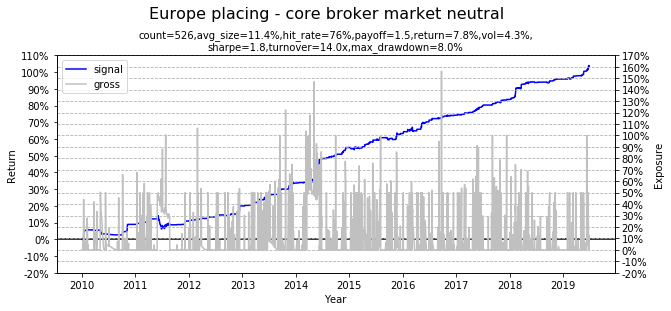

In [147]:
Europe_placing_core.plot_account('Europe placing - core broker market neutral')

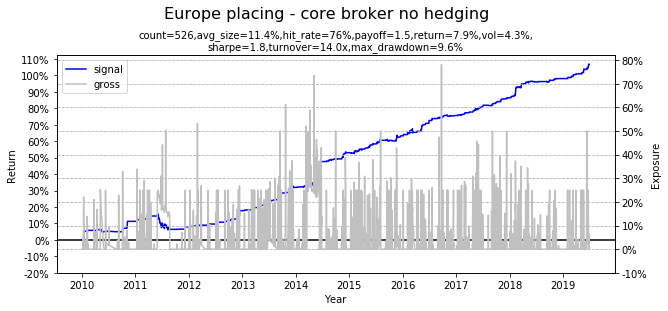

In [149]:
Europe_placing_core.plot_account('Europe placing - core broker no hedging')

In [347]:
Europe_IPO_core=signal(fundamental_df=Europe_IPO_core_df,price_VWAP_df=Europe_dict['VWAP'],volume_df=Europe_dict['volume'],\
                      max_holding=60,holding=3,sizing_scheme='fix allocation volume exit')

In [348]:
_,_=Europe_IPO_core.signal_account(target_size=0.2,capital=20,liquidity_constraint=0.2,allocation_constraint=0.02,\
                                  max_size=0.25,exit_rate=0.05,net=0,index_df=Europe_dict['abs_return']["SX5E Index"].to_frame())

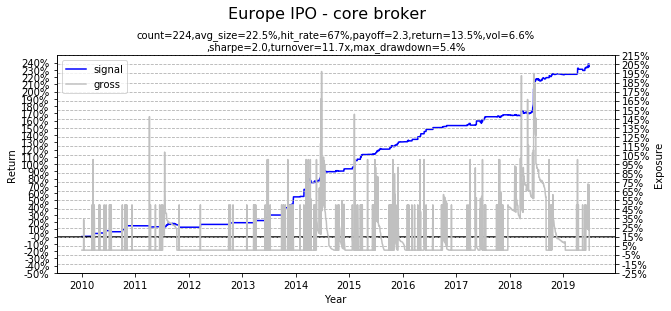

In [349]:
Europe_IPO_core.plot_account('Europe IPO - core broker')

In [137]:
Europe_core=signal(fundamental_df=Europe_core_df,price_VWAP_df=Europe_dict['VWAP'],volume_df=Europe_dict['volume'],\
                      max_holding=60,holding=3,sizing_scheme='fix allocation volume exit')

In [162]:
_,_=Europe_core.signal_account(target_size=0.2,capital=20,liquidity_constraint=0.2,allocation_constraint=0.02,\
                                  max_size=0.1,exit_rate=0.05,net=0,index_df=Europe_dict['abs_return']["SX5E Index"].to_frame())

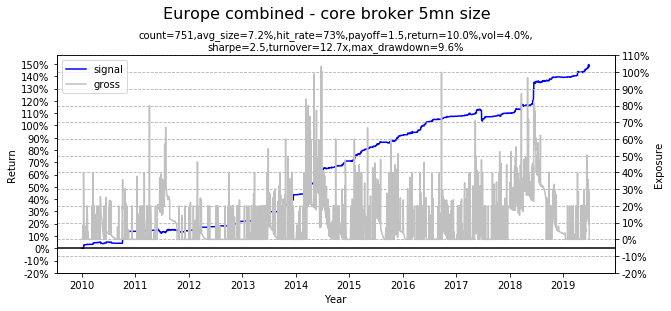

In [163]:
Europe_core.plot_account('Europe combined - core broker 5mn size')

## 4.2 US

In [133]:
US_placing_core=signal(fundamental_df=US_ABO_core_df,price_VWAP_df=US_dict['VWAP_df'],volume_df=US_dict['volume_df'],\
                      max_holding=60,holding=3,sizing_scheme='fix allocation volume exit')

In [152]:
_,_=US_placing_core.signal_account(target_size=0.1,capital=30,liquidity_constraint=0.2,allocation_constraint=0.02,\
                                  max_size=1/6,exit_rate=0.05,net='gross',index_df=US_dict['abs_return_df']["SPX Index"].to_frame())

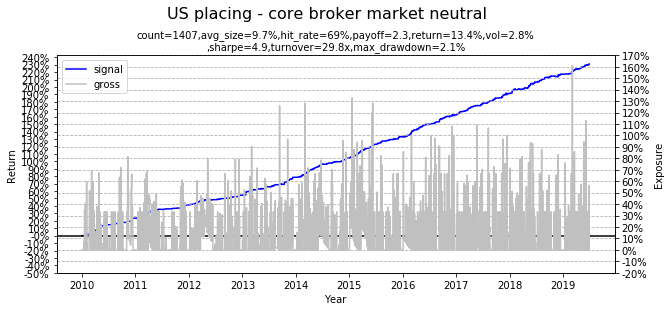

In [151]:
US_placing_core.plot_account('US placing - core broker market neutral')

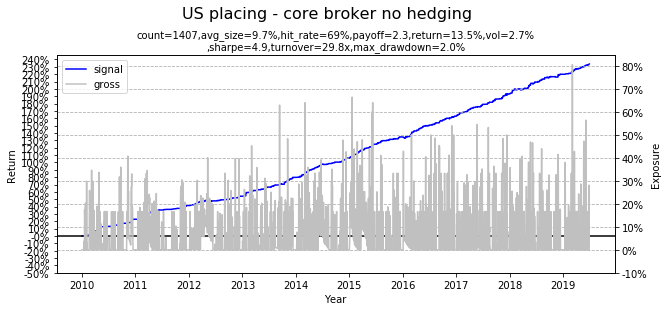

In [153]:
US_placing_core.plot_account('US placing - core broker no hedging')

In [145]:
US_placing_core.portfolio_cache[2].iloc[:,-1]

2010-01-01    0.000000
2010-01-04    0.000000
2010-01-05    0.000000
2010-01-06    0.000000
2010-01-07    0.000000
2010-01-08    0.000000
2010-01-11    0.000000
2010-01-12    0.000000
2010-01-13    0.000000
2010-01-14   -0.036958
2010-01-15    0.000000
2010-01-18    0.000000
2010-01-19   -0.175763
2010-01-20   -0.144429
2010-01-21   -0.047884
2010-01-22    0.000000
2010-01-25   -0.203166
2010-01-26   -0.007531
2010-01-27   -0.044640
2010-01-28    0.000000
2010-01-29    0.000000
2010-02-01    0.000000
2010-02-02   -0.298747
2010-02-03    0.000000
2010-02-04   -0.030141
2010-02-05    0.000000
2010-02-08    0.000000
2010-02-09    0.000000
2010-02-10    0.000000
2010-02-11    0.000000
                ...   
2019-05-20    0.000000
2019-05-21   -0.420621
2019-05-22   -0.472975
2019-05-23    0.000000
2019-05-24    0.000000
2019-05-27    0.000000
2019-05-28    0.000000
2019-05-29    0.000000
2019-05-30   -0.321849
2019-05-31    0.000000
2019-06-03    0.000000
2019-06-04   -0.221888
2019-06-05 

In [362]:
US_IPO_core=signal(fundamental_df=US_IPO_core_df,price_VWAP_df=US_dict['VWAP'],volume_df=US_dict['volume'],\
                      max_holding=60,holding=3,sizing_scheme='fix allocation volume exit')

In [363]:
_,_=US_IPO_core.signal_account(target_size=0.1,capital=30,liquidity_constraint=0.2,allocation_constraint=0.02,\
                                  max_size=1/6,exit_rate=0.05,net=0,index_df=US_dict['abs_return']["SPX Index"].to_frame())

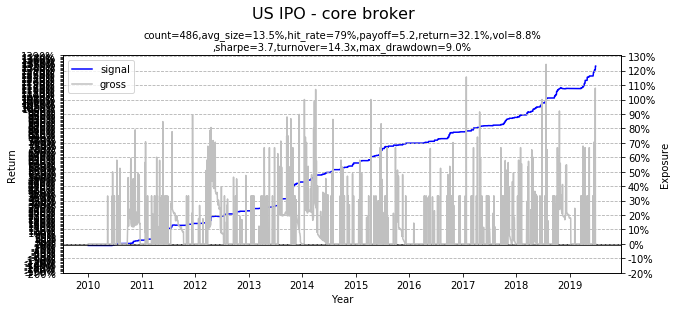

In [364]:
US_IPO_core.plot_account('US IPO - core broker')

In [50]:
comb=combine_signal([Europe_placing_core.portfolio_cache,US_placing_core.portfolio_cache],[20,30])

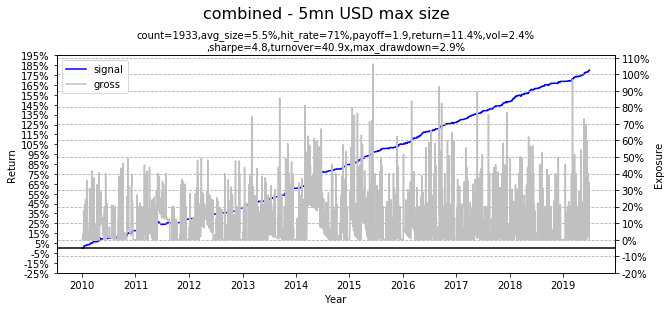

In [51]:
plot_signal('combined - 5mn USD max size',[10,4],comb)

# 5. fitting exercise

In [ ]:
holding=[10,20]
target_size=[0.05,0.1,0.15]
net=[0,0.1,0.2]
sizing_scheme=['constant','fix allocation','constant volume exit','fix allocation volume exit']
max_size=[0.1,0.15,0.2]
exit_rate=[0.01,0.03,0.05]

In [ ]:
fitting_dict={}
for i in list(itertools.product(holding,target_size,net,sizing_scheme,max_size,exit_rate)):
    placing=signal(fundamental_df=adj_Europe,price_df=Europe_price,price_VWAP_df=Europe_VWAP,volume_df=Europe_volume,\
                          max_holding=i[0],sizing_scheme=i[3])    
    cache_1,cache_2=placing.signal_account(target_size=i[1],capital=50,liquidity_constraint=0.1,\
                                                  allocation_constraint=0.05,max_size=i[4],exit_rate=i[5],net=i[2],\
                                           index_df=abs_return_Europe["SX5E Index"].to_frame())
    fitting_dict[i]=trading_analytics_date(cache_2)
    

In [ ]:
''' performance for each fitting '''
fitting=pd.DataFrame(index=fitting_dict.keys())

In [ ]:
for i in fitting_dict.keys():
    fitting.loc[i,'return']=fitting_dict[i][3]
    fitting.loc[i,'sharpe']=fitting_dict[i][5]
    fitting.loc[i,'drawdown']=fitting_dict[i][6]

In [ ]:
fitting

In [ ]:
fitting_rank=fitting.rank(axis=0)

In [ ]:
adj_rank=fitting_rank['return']+fitting_rank['sharpe']-fitting_rank['drawdown']

In [ ]:
fitting['rank']=adj_rank

In [ ]:
fitting.to_csv('fitting_df.csv')

In [ ]:
fitting[(fitting["sharpe"]>2)&(fitting["return"]>0.05)&(fitting["drawdown"]<0.05)]

In [ ]:
adj_Europe.shape

# 6. Parameter inquiry
1. Offer size
2. Market cap
3. ADV
4. Broker_core

In [ ]:
def perf_review(fundamental_df):
    higher_cap_stock_return=fundamental_df[fundamental_df['Market cap']>fundamental_df['Market cap'].quantile(0.67)]\
    ['cum stock return'].mean()
    mid_cap_stock_return=fundamental_df[(fundamental_df['Market cap']<fundamental_df['Market cap'].quantile(0.67))&\
                                        (fundamental_df['Market cap']>fundamental_df['Market cap'].quantile(0.33))]\
    ['cum stock return'].mean()
    lower_cap_stock_return=fundamental_df[fundamental_df['Market cap']<fundamental_df['Market cap'].quantile(0.33)]\
    ['cum stock return'].mean()
    avg_cap_stock_return=fundamental_df['cum stock return'].mean()
    
    print('stock return by cap '+str((higher_cap_stock_return,mid_cap_stock_return,lower_cap_stock_return,\
                                    avg_cap_stock_return)))
    
    
    higher_cap_contribution=fundamental_df[fundamental_df['Market cap']>fundamental_df['Market cap'].quantile(0.67)]\
    ['cum pnl contribution'].mean()
    mid_cap_contribution=fundamental_df[(fundamental_df['Market cap']<fundamental_df['Market cap'].quantile(0.67))&\
                                        (fundamental_df['Market cap']>fundamental_df['Market cap'].quantile(0.33))]\
    ['cum pnl contribution'].mean()
    lower_cap_contribution=fundamental_df[fundamental_df['Market cap']<fundamental_df['Market cap'].quantile(0.33)]\
    ['cum pnl contribution'].mean()
    avg_cap_contribution=fundamental_df['cum pnl contribution'].mean()

    print('stock contribution by cap '+str((higher_cap_contribution,mid_cap_contribution,lower_cap_contribution,\
                                    avg_cap_contribution)))
    
    
    higher_offer_stock_return=fundamental_df[fundamental_df['Offer size']>fundamental_df['Offer size'].quantile(0.67)]\
    ['cum stock return'].mean()
    mid_offer_stock_return=fundamental_df[(fundamental_df['Offer size']<fundamental_df['Offer size'].quantile(0.67))&\
                                        (fundamental_df['Offer size']>fundamental_df['Offer size'].quantile(0.33))]\
    ['cum stock return'].mean()
    lower_offer_stock_return=fundamental_df[fundamental_df['Offer size']<fundamental_df['Offer size'].quantile(0.33)]\
    ['cum stock return'].mean()
    avg_offer_stock_return=fundamental_df['cum stock return'].mean()
    
    print('stock return by offer size '+str((higher_offer_stock_return,mid_offer_stock_return,lower_offer_stock_return,\
                                    avg_offer_stock_return)))
    
    
    higher_offer_contribution=fundamental_df[fundamental_df['Offer size']>fundamental_df['Offer size'].quantile(0.67)]\
    ['cum pnl contribution'].mean()
    mid_offer_contribution=fundamental_df[(fundamental_df['Offer size']<fundamental_df['Offer size'].quantile(0.67))&\
                                        (fundamental_df['Offer size']>fundamental_df['Offer size'].quantile(0.33))]\
    ['cum pnl contribution'].mean()
    lower_offer_contribution=fundamental_df[fundamental_df['Offer size']<fundamental_df['Offer size'].quantile(0.33)]\
    ['cum pnl contribution'].mean()
    avg_offer_contribution=fundamental_df['cum pnl contribution'].mean()

    print('stock contribution by offer size '+str((higher_offer_contribution,mid_offer_contribution,lower_offer_contribution,\
                                    avg_offer_contribution)))    
    
    core_stock_return=fundamental_df[fundamental_df['Broker_core']==True]['cum stock return'].mean()  
    core_stock_contribution=fundamental_df[fundamental_df['Broker_core']==True]['cum pnl contribution'].mean()  
    non_core_stock_return=fundamental_df[fundamental_df['Broker_core']==False]['cum stock return'].mean()  
    non_core_stock_contribution=fundamental_df[fundamental_df['Broker_core']==False]['cum pnl contribution'].mean()      
    
    print('core return/contribution is '+str((core_stock_return,core_stock_contribution)))
    print('non core return/contribution is '+str((non_core_stock_return,non_core_stock_contribution)))

In [ ]:
perf_review(adj_Europe)

In [ ]:
perf_review(adj_US)

In [ ]:
adj_Europe.shape

In [ ]:
US_placing_core.alpha_cache[2].sum(axis=1).mean()

In [ ]:
Europe_placing_core.alpha_cache[2].sum(axis=1).mean()

# 7. Buy the dip

In [177]:
Europe_ABO_df

Announced Date Listing date       Ticker  \
SAN SM      2015-01-08 2015-01-13     2015-01-08   2015-01-13       SAN SM   
LLOY LN     2014-03-25 2014-03-26     2014-03-25   2014-03-26      LLOY LN   
            2013-09-16 2013-09-17     2013-09-16   2013-09-17      LLOY LN   
VOLVB SS    2010-10-06 2010-10-07     2010-10-06   2010-10-07     VOLVB SS   
ELE SM      2014-11-05 2014-11-21     2014-11-05   2014-11-21       ELE SM   
DBK GR      2013-04-29 2013-04-30     2013-04-29   2013-04-30       DBK GR   
RBI AV      2014-01-21 2014-01-23     2014-01-21   2014-01-23       RBI AV   
AZN LN      2019-03-28 2019-03-29     2019-03-28   2019-03-29       AZN LN   
1657599D SS 2013-09-24 2013-09-25     2013-09-24   2013-09-25  1657599D SS   
RBS LN      2018-06-04 2018-06-05     2018-06-04   2018-06-05       RBS LN   
            2015-08-03 2015-08-04     2015-08-03   2015-08-04       RBS LN   
1657599D SS 2013-06-18 2013-06-19     2013-06-18   2013-06-19  1657599D SS   
AIR FP      2013-04-16 2013-04-17     2013-04-16   2013-04-17       AIR FP   
            2013-04-08 2013-04-09     2013-04-08   2013-04-09       AIR FP   
1657599D SS 2011-02-03 2011-02-04     2011-02-03   2011-02-04  1657599D SS   
REP SM      2014-06-03 2014-06-04     2014-06-03   2014-06-04       REP SM   
1COV GR     2018-05-03 2018-05-04     2018-05-03   2018-05-04      1COV GR   
CON GR      2011-03-28 2011-03-28     2011-03-28   2011-03-28       CON GR   
BBVA SM     2014-11-19 2014-11-24     2014-11-19   2014-11-24      BBVA SM   
GLEN LN     2015-09-07 2015-09-21     2015-09-07   2015-09-21      GLEN LN   
ADEN SW     2014-03-12 2014-03-13     2014-03-12   2014-03-13      ADEN SW   
ENEL IM     2015-02-25 2015-02-26     2015-02-25   2015-02-26      ENEL IM   
TKA GR      2011-07-07 2011-07-07     2011-07-07   2011-07-07       TKA GR   
SKY LN      2014-07-25 2014-07-30     2014-07-25   2014-07-30       SKY LN   
HEIA NA     2017-09-18 2017-09-19     2017-09-18   2017-09-19      HEIA NA   
BNP FP      2017-05-03 2017-05-04     2017-05-03   2017-05-04       BNP FP   
1COV GR     2018-01-10 2018-01-11     2018-01-10   2018-01-11      1COV GR   
AIR FP      2012-12-06 2012-12-06     2012-12-06   2012-12-06       AIR FP   
IBE SM      2014-04-09 2014-04-10     2014-04-09   2014-04-10       IBE SM   
CON GR      2012-09-24 2012-09-25     2012-09-24   2012-09-25       CON GR   
...                                          ...          ...          ...   
CRN LN      2016-03-21 2016-04-19     2016-03-21   2016-04-19       CRN LN   
ACTI SS     2011-01-26 2011-01-27     2011-01-26   2011-01-27      ACTI SS   
MONY LN     2015-07-30 2015-07-31     2015-07-30   2015-07-31      MONY LN   
TPZ SM      2017-05-18 2017-05-19     2017-05-18   2017-05-19       TPZ SM   
JE/ LN      2014-11-12 2014-11-12     2014-11-12   2014-11-12       JE/ LN   
BME SM      2010-02-22 2010-02-22     2010-02-22   2010-02-22       BME SM   
CRN LN      2017-05-15 2017-05-18     2017-05-15   2017-05-18       CRN LN   
AA/ LN      2015-03-25 2015-04-21     2015-03-25   2015-04-21       AA/ LN   
DC/ LN      2010-09-17 2010-09-17     2010-09-17   2010-09-17       DC/ LN   
TALK LN     2017-10-12 2017-10-13     2017-10-12   2017-10-13      TALK LN   
JLG LN      2015-10-22 2015-10-22     2015-10-22   2015-10-22       JLG LN   
CRN LN      2015-12-01 2015-12-02     2015-12-01   2015-12-02       CRN LN   
EQN LN      2016-12-12 2016-12-13     2016-12-12   2016-12-13       EQN LN   
JLG LN      2016-04-20 2016-04-20     2016-04-20   2016-04-20       JLG LN   
TBCG LN     2017-06-27 2017-06-28     2017-06-27   2017-06-28      TBCG LN   
BAVA DC     2015-01-26 2015-01-26     2015-01-26   2015-01-26      BAVA DC   
RCH LN      2015-10-28 2015-10-30     2015-10-28   2015-10-30       RCH LN   
JST GR      2019-06-25 2019-06-26     2019-06-25   2019-06-26       JST GR   
MONI LN     2014-06-10 2014-06-11     2014-06-10   2014-06-11      MONI LN   
NDX SS      2016-11-14 2016-11-15     2016-11-14   2016-

In [298]:
def placing_follow_return(signal,price_orig_df,price_df,abs_return_df,index_df,evaluate_period,offer_price,return_period):
    ''' 
    calculate abs and rel return following the placing
    '''
    try:
        listing_price=price_orig_df.loc[:,signal[0]][signal[2]]

        firstday_abs_return=listing_price/offer_price-1
        firstday_rel_return=listing_price/offer_price-1-index_df.loc[signal[2]]

        rel_return_df=abs_return_df.sub(index_df,axis=0)

        target_abs_return_df=abs_return_df.loc[signal[2]:,signal[0]][:evaluate_period]
        target_rel_return_df=rel_return_df.loc[signal[2]:,signal[0]][:evaluate_period]

        target_abs_return_df.iloc[0]=firstday_abs_return
        target_rel_return_df.iloc[0]=firstday_rel_return

        evaluate_abs_return=((1+target_abs_return_df).cumprod()-1).iloc[-1]
        evaluate_rel_return=((1+target_rel_return_df).cumprod()-1).iloc[-1]

        follow_abs_return=((1+abs_return_df.loc[signal[2]:,signal[0]][evaluate_period:evaluate_period+return_period]).\
        cumprod()-1)
        follow_abs_return.index=list(range(1,follow_abs_return.shape[0]+1))
        
        follow_rel_return=((1+rel_return_df.loc[signal[2]:,signal[0]][evaluate_period:evaluate_period+return_period]).\
        cumprod()-1)
        follow_rel_return.index=list(range(1,follow_rel_return.shape[0]+1))
    except:
        evaluate_abs_return=None
        evaluate_rel_return=None
        follow_abs_return=None
        follow_rel_return=None
    return evaluate_abs_return,evaluate_rel_return,follow_abs_return,follow_rel_return

In [336]:
five_day_rel_return_Europe=Europe_ABO_df.apply(lambda x: placing_follow_return(x.name,Europe_dict['price_orig_df'],\
                                                                       Europe_dict['price_df'],Europe_dict['abs_return_df'],\
                                                                      Europe_dict['abs_return_df']['SX5E Index'],5,\
                                                                       x['Offer price'],40)[1],axis=1)

In [337]:
five_day_follow_rel_return_Europe=Europe_ABO_df.apply(lambda x: placing_follow_return(x.name,Europe_dict['price_orig_df'],\
                                                                       Europe_dict['price_df'],Europe_dict['abs_return_df'],\
                                                                      Europe_dict['abs_return_df']['SX5E Index'],5,\
                                                                       x['Offer price'],40)[3],axis=1)

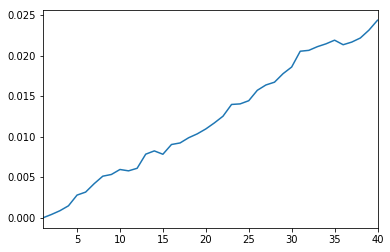

In [348]:
five_day_follow_rel_return_Europe.mean(axis=0).plot()

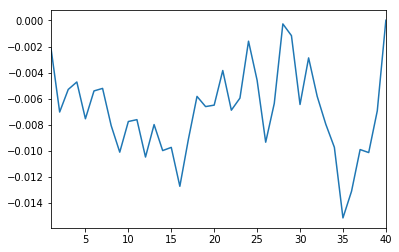

In [341]:
five_day_follow_rel_return_Europe.loc[five_day_rel_return_Europe[five_day_rel_return_Europe<-0.05].index].mean(axis=0).plot()

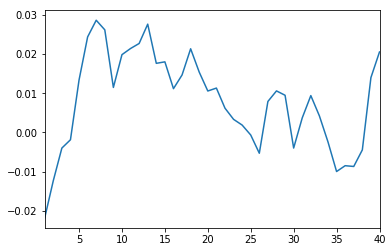

In [343]:
five_day_follow_rel_return_Europe.loc[five_day_rel_return_Europe[five_day_rel_return_Europe<-0.1].index].mean(axis=0).plot()

In [329]:
ten_day_rel_return_Europe=Europe_ABO_df.apply(lambda x: placing_follow_return(x.name,Europe_dict['price_orig_df'],\
                                                                       Europe_dict['price_df'],Europe_dict['abs_return_df'],\
                                                                      Europe_dict['abs_return_df']['SX5E Index'],10,\
                                                                       x['Offer price'],40)[1],axis=1)

In [330]:
ten_day_follow_rel_return_Europe=Europe_ABO_df.apply(lambda x: placing_follow_return(x.name,Europe_dict['price_orig_df'],\
                                                                       Europe_dict['price_df'],Europe_dict['abs_return_df'],\
                                                                      Europe_dict['abs_return_df']['SX5E Index'],10,\
                                                                       x['Offer price'],40)[3],axis=1)

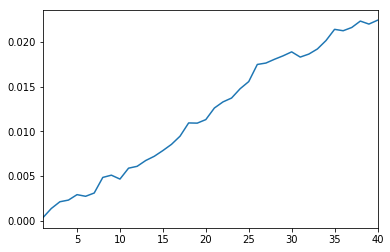

In [347]:
ten_day_follow_rel_return_Europe.mean(axis=0).plot()

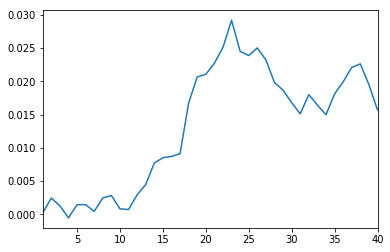

In [342]:
ten_day_follow_rel_return_Europe.loc[ten_day_rel_return_Europe[ten_day_rel_return_Europe<-0.05].index].mean(axis=0).plot()

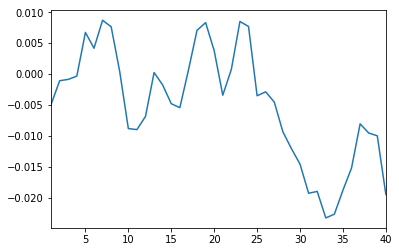

In [344]:
ten_day_follow_rel_return_Europe.loc[ten_day_rel_return_Europe[ten_day_rel_return_Europe<-0.1].index].mean(axis=0).plot()

In [331]:
twenty_day_rel_return_Europe=Europe_ABO_df.apply(lambda x: placing_follow_return(x.name,Europe_dict['price_orig_df'],\
                                                                       Europe_dict['price_df'],Europe_dict['abs_return_df'],\
                                                                      Europe_dict['abs_return_df']['SX5E Index'],20,\
                                                                       x['Offer price'],40)[1],axis=1)

In [332]:
twenty_day_follow_rel_return_Europe=Europe_ABO_df.apply(lambda x: placing_follow_return(x.name,Europe_dict['price_orig_df'],\
                                                                       Europe_dict['price_df'],Europe_dict['abs_return_df'],\
                                                                      Europe_dict['abs_return_df']['SX5E Index'],20,\
                                                                       x['Offer price'],40)[3],axis=1)

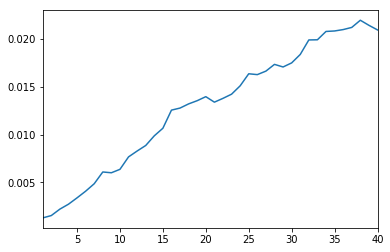

In [346]:
twenty_day_follow_rel_return_Europe.mean(axis=0).plot()

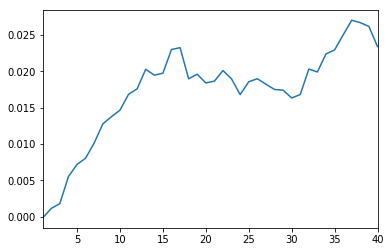

In [340]:
twenty_day_follow_rel_return_Europe.loc[twenty_day_rel_return_Europe[twenty_day_rel_return_Europe<-0.05].index].mean(axis=0).plot()

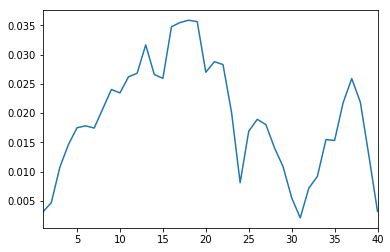

In [345]:
twenty_day_follow_rel_return_Europe.loc[twenty_day_rel_return_Europe[twenty_day_rel_return_Europe<-0.1].index].mean(axis=0).plot()

In [349]:
five_day_rel_return_US=US_ABO_df.apply(lambda x: placing_follow_return(x.name,US_dict['price_orig_df'],\
                                                                       US_dict['price_df'],US_dict['abs_return_df'],\
                                                                      US_dict['abs_return_df']['SPX Index'],5,\
                                                                       x['Offer price'],40)[1],axis=1)

In [350]:
five_day_follow_rel_return_US=US_ABO_df.apply(lambda x: placing_follow_return(x.name,US_dict['price_orig_df'],\
                                                                       US_dict['price_df'],US_dict['abs_return_df'],\
                                                                      US_dict['abs_return_df']['SPX Index'],5,\
                                                                       x['Offer price'],40)[3],axis=1)

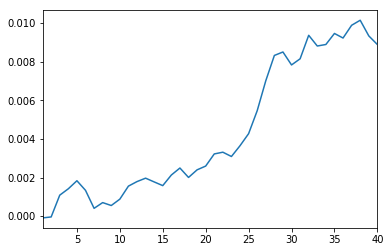

In [351]:
five_day_follow_rel_return_US.mean(axis=0).plot()

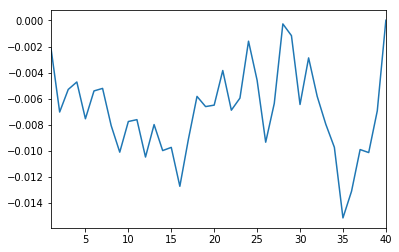

In [341]:
five_day_follow_rel_return_US.loc[five_day_rel_return_US[five_day_rel_return_US<-0.05].index].mean(axis=0).plot()

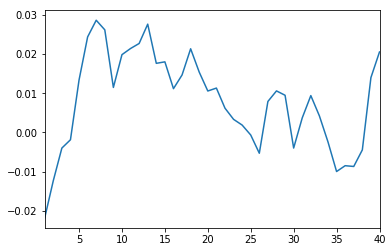

In [343]:
five_day_follow_rel_return_US.loc[five_day_rel_return_US[five_day_rel_return_US<-0.1].index].mean(axis=0).plot()

In [352]:
ten_day_rel_return_US=US_ABO_df.apply(lambda x: placing_follow_return(x.name,US_dict['price_orig_df'],\
                                                                       US_dict['price_df'],US_dict['abs_return_df'],\
                                                                      US_dict['abs_return_df']['SPX Index'],10,\
                                                                       x['Offer price'],40)[1],axis=1)

In [353]:
ten_day_follow_rel_return_US=US_ABO_df.apply(lambda x: placing_follow_return(x.name,US_dict['price_orig_df'],\
                                                                       US_dict['price_df'],US_dict['abs_return_df'],\
                                                                      US_dict['abs_return_df']['SPX Index'],10,\
                                                                       x['Offer price'],40)[3],axis=1)

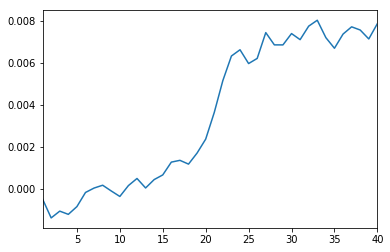

In [356]:
ten_day_follow_rel_return_US.mean(axis=0).plot()

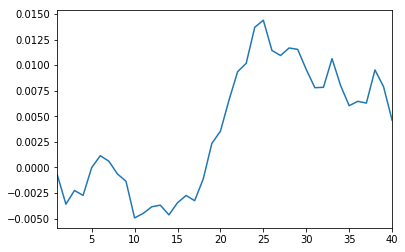

In [354]:
ten_day_follow_rel_return_US.loc[ten_day_rel_return_US[ten_day_rel_return_US<-0.05].index].mean(axis=0).plot()

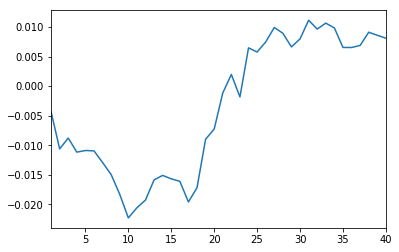

In [355]:
ten_day_follow_rel_return_US.loc[ten_day_rel_return_US[ten_day_rel_return_US<-0.1].index].mean(axis=0).plot()

In [363]:
twenty_day_rel_return_US=US_ABO_df.apply(lambda x: placing_follow_return(x.name,US_dict['price_orig_df'],\
                                                                       US_dict['price_df'],US_dict['abs_return_df'],\
                                                                      US_dict['abs_return_df']['SPX Index'],20,\
                                                                       x['Offer price'],40)[1],axis=1)

In [364]:
twenty_day_follow_rel_return_US=US_ABO_df.apply(lambda x: placing_follow_return(x.name,US_dict['price_orig_df'],\
                                                                       US_dict['price_df'],US_dict['abs_return_df'],\
                                                                      US_dict['abs_return_df']['SPX Index'],20,\
                                                                       x['Offer price'],40)[3],axis=1)

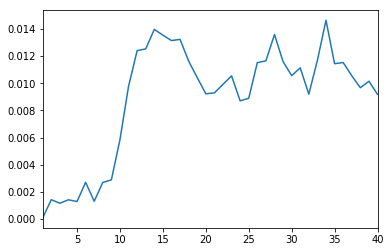

In [365]:
twenty_day_follow_rel_return_US.loc[twenty_day_rel_return_US[twenty_day_rel_return_US<-0.05].index].mean(axis=0).plot()

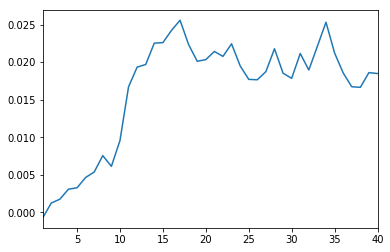

In [366]:
twenty_day_follow_rel_return_US.loc[twenty_day_rel_return_US[twenty_day_rel_return_US<-0.1].index].mean(axis=0).plot()

In [259]:
Europe_BTD=pd.concat([ten_day_abs_return,ten_day_rel_return,twenty_day_follow_abs_return,twenty_day_follow_rel_return],axis=1)

In [260]:
Europe_BTD.columns=['evaluate_abs','evaluate_rel','follow_abs','follow_rel']

In [261]:
Europe_BTD[Europe_BTD['evaluate_rel']<-0.1].mean()

evaluate_abs   -0.142652
evaluate_rel   -0.155117
follow_abs      0.004969
follow_rel      0.002163
dtype: float64